In [813]:
import numpy as np
from vugrad.ops import Normalize
from vugrad.core import TensorNode, Op

cntxt1, cntxt2, cntxt3 = dict(), dict(), dict()
x = TensorNode(np.arange(20).reshape(4, -1))
b = TensorNode(np.asarray([[0], [-0.5], [0.3], [0.7], [-0.5]]))
c = TensorNode(np.ones((1, 4)))

In [814]:
EPOCH = 10000

current = list()
for _ in range(EPOCH):
    o = Normalize.do_forward(x)
    o = o.matmul(b)
    o = c.matmul(o)
    o.backward()
    x.value = x.value - x.grad
    o.zero_grad()
    current.append(o.value.squeeze())

In [815]:
class Normalize1(Op):
    @staticmethod
    def forward(context, x):
        sumd = x.sum(axis=1, keepdims=True)
        context['x'], context['sumd'] = x, sumd
        return x / sumd

    @staticmethod
    def backward(context, go):
        x, sumd = context['x'], context['sumd']
        return (go / sumd) - (x/(sumd * sumd)) - go.sum(axis=1, keepdims=True)

cntxt1, cntxt2, cntxt3 = dict(), dict(), dict()
x = TensorNode(np.arange(20).reshape(4, -1))
b = TensorNode(np.asarray([[0], [-0.5], [0.3], [0.7], [-0.5]]))
c = TensorNode(np.ones((1, 4)))

In [816]:
my = list()
for _ in range(EPOCH):
    o = Normalize1.do_forward(x)
    o = o.matmul(b)
    o = c.matmul(o)
    o.backward()
    x.value = x.value - x.grad
    o.zero_grad()
    my.append(o.value.squeeze())

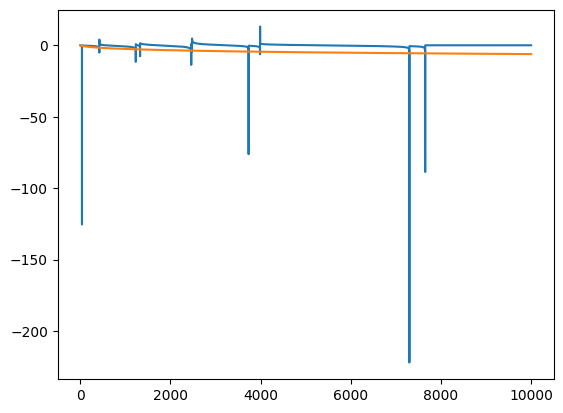

In [818]:
import matplotlib.pyplot as plt
plt.plot(current)
plt.plot(my)